<a href="https://colab.research.google.com/github/arshita-07/insurance-price-prediction/blob/main/insurance_value_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import io  
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["smoker"]=map_smoking(df["smoker"])

In [ ]:
def map_region(column):
    mapped=[]
    
    for row in column:
        
        if row=="southwest":
            mapped.append(1)
        elif row =="southeast":
            mapped.append(2)
        elif row=="northwest":
            mapped.append(3)
        else:
            mapped.append(4)
        
        
    return mapped
df["region"]=map_region(df["region"])

In [ ]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="female":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["sex"]=map_smoking(df["sex"])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

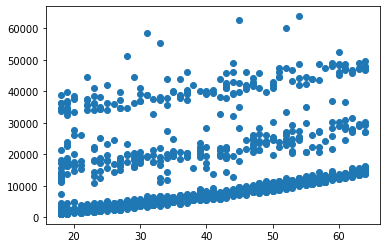

In [ ]:
plt.scatter(df["age"],df["charges"])


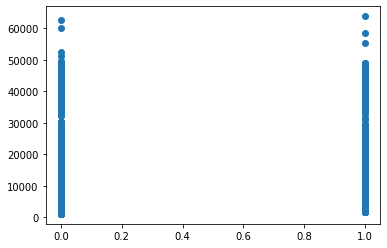

In [ ]:
plt.scatter(df["sex"],df["charges"])


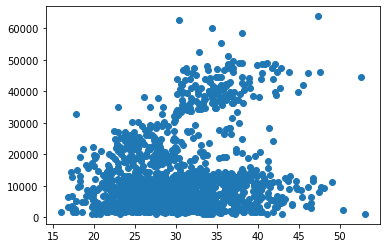

In [ ]:
plt.scatter(df["bmi"],df["charges"])


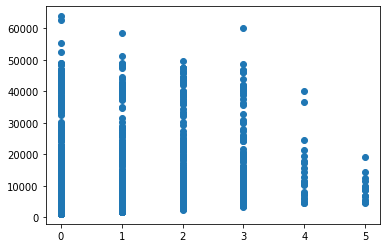

In [ ]:
plt.scatter(df["children"],df["charges"])


plt.scatter(df["smoker"],df["charges"])


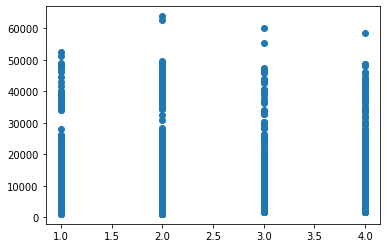

In [ ]:
plt.scatter(df["region"],df["charges"])

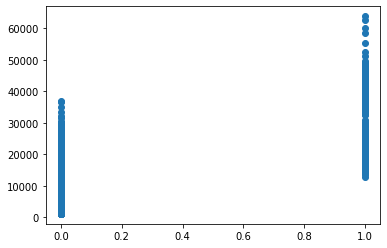

In [ ]:
plt.scatter(df["smoker"],df["charges"])

In [70]:
x= df[["age","sex","bmi","children","smoker","region"]].to_numpy()
x = np.hstack((x0,x))
x

array([[ 1., 19.,  1., ...,  0.,  1.,  1.],
       [ 1., 18.,  0., ...,  1.,  0.,  2.],
       [ 1., 28.,  0., ...,  3.,  0.,  2.],
       ...,
       [ 1., 18.,  1., ...,  0.,  0.,  2.],
       [ 1., 21.,  1., ...,  0.,  0.,  1.],
       [ 1., 61.,  1., ...,  0.,  1.,  3.]])

In [ ]:
y = df["charges"].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [71]:
theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)
theta

array([-13361.12296708,    257.28807486,    131.11057962,    332.57013224,
          479.36939355,  23820.43412267,    353.64001656])

In [69]:
x0 = np.ones((1338,1))
x0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [75]:
def pred_price(age, sex, bmi, children, smoker, region):
  if sex=="female":
    s=1
  else:
    s=0
  if region=="southwest":
    r=1
  elif region =="southeast":
    r=2
  elif region=="northwest":
    r=3
  else:
    r=4
  if smoker=="yes":
    smoker_val = 1
  else:
    smoker_val=0
  
  inputs = np.array([1,age, s, bmi, children, smoker_val, r])
  return np.matmul(inputs, theta)


In [76]:
pred_price(34,"male",35,3,"yes","southwest")

32638.808526432913